In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
import pandas as pd
pd.set_option('display.max_columns',100)

In [19]:
# Load the dataset
data = pd.read_csv('../data/main_aly_spotify.csv')

# Display the first few rows of the dataset
data.head()


,track_popularity,mode,speechiness,instrumentalness,energy,danceability,liveness,acousticness,valence,duration_ms,type,key,tempo,loudness
0,90,0.0,0.244,0.000002,0.520,0.561,0.3550,0.05030,0.424,239360.0,audio_features,11.0,153.150,-9.342
1,78,0.0,0.323,0.000000,0.546,0.908,0.0707,0.01270,0.225,170502.0,audio_features,8.0,131.016,-10.491
2,81,1.0,0.591,0.000000,0.358,0.841,0.3900,0.02010,0.329,261544.0,audio_features,9.0,158.014,-8.368
3,75,0.0,0.316,0.000000,0.433,0.849,0.3880,0.04070,0.395,152962.0,audio_features,5.0,142.110,-8.434
4,77,1.0,0.198,0.000000,0.614,0.934,0.1230,0.00274,0.616,160821.0,audio_features,5.0,144.045,-7.384


### EDA

In [20]:
data.head()

,track_popularity,mode,speechiness,instrumentalness,energy,danceability,liveness,acousticness,valence,duration_ms,type,key,tempo,loudness
0,90,0.0,0.244,0.000002,0.520,0.561,0.3550,0.05030,0.424,239360.0,audio_features,11.0,153.150,-9.342
1,78,0.0,0.323,0.000000,0.546,0.908,0.0707,0.01270,0.225,170502.0,audio_features,8.0,131.016,-10.491
2,81,1.0,0.591,0.000000,0.358,0.841,0.3900,0.02010,0.329,261544.0,audio_features,9.0,158.014,-8.368
3,75,0.0,0.316,0.000000,0.433,0.849,0.3880,0.04070,0.395,152962.0,audio_features,5.0,142.110,-8.434
4,77,1.0,0.198,0.000000,0.614,0.934,0.1230,0.00274,0.616,160821.0,audio_features,5.0,144.045,-7.384


## Train test Split

In [21]:
from sklearn.model_selection import train_test_split

# Drop the 'type' column
data.drop(columns=['type'], inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Split data into features and target
X = data.drop(columns=['track_popularity'])
y = data['track_popularity']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((14270, 12), (3568, 12), (14270,), (3568,))

## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
linear_predictions = linear_model.predict(X_test)

# Calculate the mean squared error for the linear model
linear_mse = mean_squared_error(y_test, linear_predictions)

linear_mse


566.3049145134436

## Random Forest Regressor

In [23]:
import pandas as pd
import time
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Start the timer
start_time = time.time()

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Stop the timer and calculate the time taken
end_time = time.time()
time_taken = end_time - start_time

# Add unit for time taken
time_taken = round(time_taken, 2)


# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Calculate the mean squared error for the Random Forest model
rf_mse = mean_squared_error(y_test, rf_predictions)

# Round all values to 2 decimal places
rf_mse_rounded = round(rf_mse, 2)

# Create a DataFrame to store time taken and MSE
data = {'ML Model': ['Random Forest'], 'Time Taken': time_taken, 'MSE': [rf_mse_rounded]}
df = pd.DataFrame(data)

df


,ML Model,Time Taken(s),MSE
0,Random Forest,8.48,325.05


### Hyper Parameter tuning - Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the hyperparameters and their possible values
param_grid_rf = {
    'n_estimators': [100, 150,200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Setup the grid search
grid_search_rf = GridSearchCV(rf_regressor, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Start the grid search
grid_search_rf.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_rf = grid_search_rf.best_params_
best_params_rf




{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

### Applying optimized parameters to Random forest

In [25]:
# Train the Random Forest model with the best hyperparameters
start_time_tuned = time.time()
optimized_rf = RandomForestRegressor(**best_params_rf, random_state=42)
optimized_rf.fit(X_train, y_train)
end_time_tuned = time.time()

# Stop the timer and calculate the time taken to train the optimized model
time_taken_tuned = end_time_tuned - start_time_tuned
time_taken_tuned = round(time_taken_tuned, 2)

# Predict on the test set using the optimized model
optimized_rf_predictions = optimized_rf.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the optimized model
optimized_rf_mse = mean_squared_error(y_test, optimized_rf_predictions)
optimized_rf_mse_rounded = round(optimized_rf_mse, 2)

# Append the data to the DataFrame
data = {'ML Model': ['Random Forest', 'Optimized Random Forest'],
        'Time Taken': [time_taken, time_taken_tuned],
        'MSE': [rf_mse_rounded, optimized_rf_mse_rounded]}
df = pd.DataFrame(data)

df

,ML Model,Time Taken,MSE
0,Random Forest,8.48,325.05
1,Optimized Random Forest,4.70,322.51


### Feature Importance - Random Forest

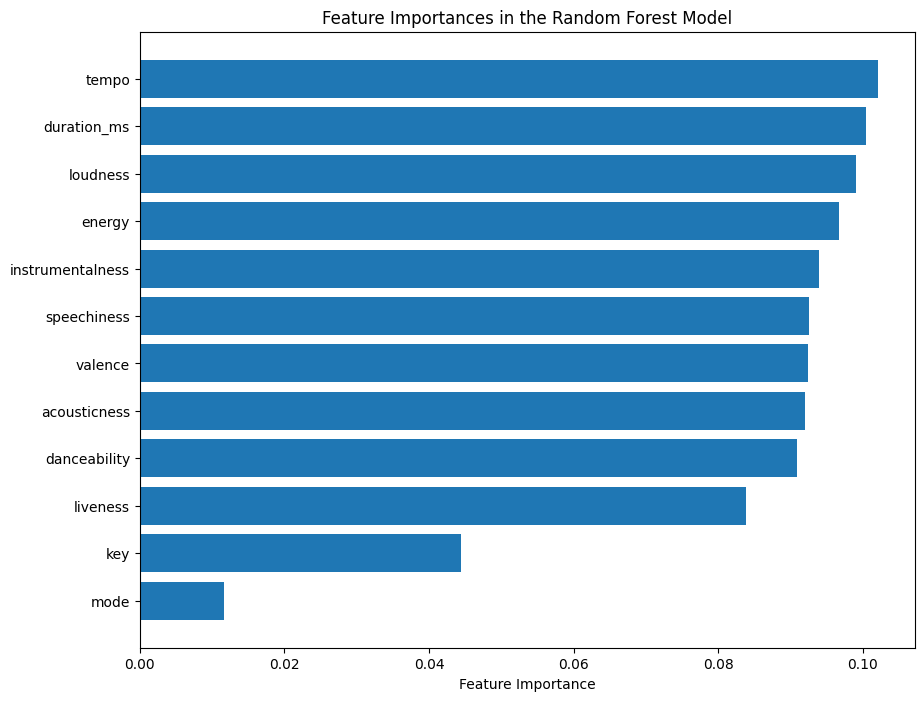

In [26]:

# Plotting feature importances for Random Forest
feature_importances_rf = optimized_rf.feature_importances_
sorted_idx_rf = feature_importances_rf.argsort()

plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx_rf], feature_importances_rf[sorted_idx_rf])
plt.xlabel("Feature Importance")
plt.title("Feature Importances in the Random Forest Model")
plt.show()


## XgBoost

In [27]:
import pandas as pd
import time
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
warnings.filterwarnings("ignore")

# Start the timer
start_time = time.time()
# Train an XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Stop the timer and calculate the time taken
end_time = time.time()
time_taken = end_time - start_time

# Add unit for time taken
time_taken = round(time_taken, 2)


# Predict on the test set
xgb_predictions = xgb_model.predict(X_test)

# Calculate the mean squared error for the XGBoost model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mse_rounded = round(xgb_mse, 2)

# Append the XGBoost MSE to the DataFrame
data['ML Model'].append('XGBoost')
data['Time Taken'].append(time_taken)
data['MSE'].append(xgb_mse_rounded)

df = pd.DataFrame(data)

df


,ML Model,Time Taken,MSE
0,Random Forest,8.48,325.05
1,Optimized Random Forest,4.70,322.51
2,XGBoost,0.20,371.63


### Hyper para meter Tuning - XGBoost



In [28]:
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore")

# Define the hyperparameters and their possible values
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'n_estimators': [100, 200]  
}

# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)

# Setup the grid search
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Start the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

best_params


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Users/abhishek-mehra/Library/CloudStorage/GoogleDrive-iiabhishekmehra@gmail.com/Other computers/My Laptop/Workspace/Projects/Spotify-self-analysis/venv/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/abhishek-mehra/Library/CloudStorage/GoogleDrive-iiabhishekmehra@gmail.com/Other computers/My Laptop/Workspace/Projects/Spotify-self-analysis/venv/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/abhishek-mehra/Library/CloudStorage/GoogleDrive-iiabhishekmehra@gmail.com/Other computers/My Laptop/Workspace/Projects/Spotify-self-analysis/venv/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 200,
 'subsample': 0.9}

### Applying best parameter as per hyper parameter tuning- XGboost


In [29]:
warnings.filterwarnings("ignore")
start_time_tuned = time.time()

# Train the XGBoost model with the best hyperparameters
optimized_xgb = xgb.XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
optimized_xgb.fit(X_train, y_train)

end_time_tuned = time.time()

# Stop the timer and calculate the time taken to train the optimized model
time_taken_tuned = end_time_tuned - start_time_tuned
time_taken_tuned = round(time_taken_tuned, 2)


# Predict on the test set
optimized_xgb_predictions = optimized_xgb.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the optimized model
optimized_xgb_mse = mean_squared_error(y_test, optimized_xgb_predictions)

data['ML Model'].append('Optimzed XGBoost')
data['Time Taken'].append(time_taken_tuned)
data['MSE'].append(optimized_xgb_mse)

df = pd.DataFrame(data)

df


,ML Model,Time Taken,MSE
0,Random Forest,8.48,325.050000
1,Optimized Random Forest,4.70,322.510000
2,XGBoost,0.20,371.630000
3,Optimzed XGBoost,0.30,353.355806


## Feature Importance

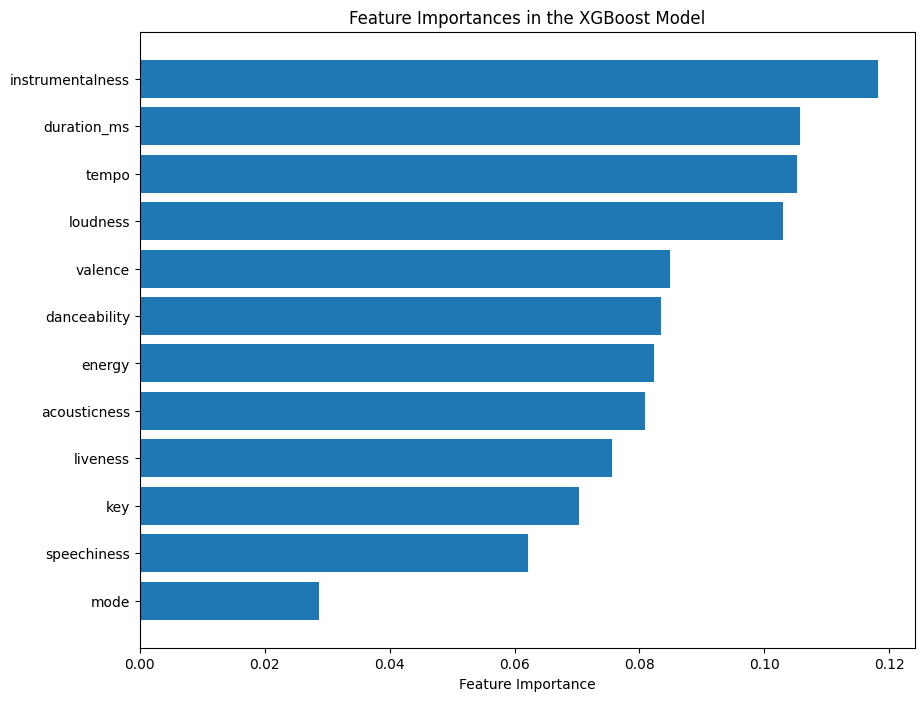

In [30]:
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
# Once you have the trained optimized_xgb model:
feature_importances = optimized_xgb.feature_importances_

# Sort the features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importances in the XGBoost Model")
plt.show()


## GBM

In [31]:
warnings.filterwarnings("ignore")
# Train the GBM model
from sklearn.ensemble import GradientBoostingRegressor

start_time_gbm = time.time()
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)
end_time_gbm = time.time()

# Stop the timer and calculate the time taken
time_taken_gbm = end_time_gbm - start_time_gbm
time_taken_gbm_with_unit = round(time_taken_gbm, 2)

# Predict on the test set
gbm_predictions = gbm_model.predict(X_test)

# Calculate the mean squared error for the GBM model
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_mse_rounded = round(gbm_mse, 2)

# Append the GBM MSE to the DataFrame
data['ML Model'].append('GBM')
data['Time Taken'].append(time_taken_gbm_with_unit)
data['MSE'].append(gbm_mse_rounded)

df = pd.DataFrame(data)

df


,ML Model,Time Taken,MSE
0,Random Forest,8.48,325.050000
1,Optimized Random Forest,4.70,322.510000
2,XGBoost,0.20,371.630000
3,Optimzed XGBoost,0.30,353.355806
4,GBM,2.32,497.730000


### Hyper parameter tuning GBM

In [32]:
warnings.filterwarnings("ignore")
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values for GBM
param_grid_gbm = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the GBM regressor
gbm_regressor = GradientBoostingRegressor(random_state=42)

# Setup the grid search
grid_search_gbm = GridSearchCV(gbm_regressor, param_grid_gbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Start the grid search
grid_search_gbm.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_gbm = grid_search_gbm.best_params_
best_params_gbm


{'learning_rate': 0.1,
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

### Applying Optimized hyper paramerters to GBM

In [33]:
warnings.filterwarnings("ignore")
start_time_tuned_gbm = time.time()

# Train the GBM model with the best hyperparameters
optimized_gbm = GradientBoostingRegressor(**best_params_gbm, random_state=42)
optimized_gbm.fit(X_train, y_train)

end_time_tuned_gbm = time.time()

# Stop the timer and calculate the time taken to train the optimized GBM model
time_taken_tuned_gbm = end_time_tuned_gbm - start_time_tuned_gbm
time_taken_tuned_gbm = round(time_taken_tuned_gbm, 2)

# Predict on the test set
optimized_gbm_predictions = optimized_gbm.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the optimized GBM model
optimized_gbm_mse = mean_squared_error(y_test, optimized_gbm_predictions)

data['ML Model'].append('Optimized GBM')
data['Time Taken'].append(time_taken_tuned_gbm)
data['MSE'].append(optimized_gbm_mse)

df = pd.DataFrame(data)

df


,ML Model,Time Taken,MSE
0,Random Forest,8.48,325.050000
1,Optimized Random Forest,4.70,322.510000
2,XGBoost,0.20,371.630000
3,Optimzed XGBoost,0.30,353.355806
4,GBM,2.32,497.730000
5,Optimized GBM,10.54,359.149204
